## Strategy

**Signal:** When high of a candlestick has gained more than 20% from the opening. 


**Fibonacci Retracements** are calculated based upon open and high of the candlestick.

*Entry Level:* 0.786

*Exit Level:* 0.5


**Entry:** If you don't have an open position, give limit buy order after the signal.

If were you already in position and you exit the position before the price drops to the entry level of current signal, give limit buy order.


**Exit:** Give limit sell order right after the entry and wait until the order is filled.

In [77]:
import pandas as pd
from datetime import datetime as dt,timedelta
from os import path
import numpy as np
from matplotlib import pyplot as plt 
from binance.client import Client
plt.style.use('seaborn')

In [78]:
###### GETTING DATA ######
pair = 'FTMUSDT'
start_date = '1 Sep, 2018'
end_date = '1 Sep, 2022'
interval = Client.KLINE_INTERVAL_1HOUR
API_KEY='YOUR_API_KEYS'
API_SECRET='YOUR_SECRET_KEYS'

client = Client(API_KEY,API_SECRET)
candlesticks = client.get_historical_klines(pair, interval, start_date, end_date)


In [79]:
# To Dataframe
df = pd.DataFrame(candlesticks)
df=df[[0,1,2,3,4]]
df[0] = pd.to_datetime(df[0]/1000,unit='s')
df[[1,2,3,4]] = df[[1,2,3,4]].apply(pd.to_numeric)
df

,0,1,2,3,4
0,2019-06-11 04:00:00,0.03590,0.04500,0.03000,0.03880
1,2019-06-11 05:00:00,0.03877,0.04000,0.03640,0.03659
2,2019-06-11 06:00:00,0.03658,0.03842,0.03575,0.03785
3,2019-06-11 07:00:00,0.03786,0.03897,0.03730,0.03838
4,2019-06-11 08:00:00,0.03838,0.03840,0.03700,0.03750
...,...,...,...,...,...
24829,2022-04-12 11:00:00,1.16260,1.18300,1.16050,1.18270
24830,2022-04-12 12:00:00,1.18270,1.18770,1.15490,1.18710
24831,2022-04-12 13:00:00,1.18730,1.18840,1.16380,1.17510
24832,2022-04-12 14:00:00,1.17540,1.17670,1.14420,1.14840


In [98]:

signal_dates = []
entry_dates = []
entry_prices = []
exit_dates = []
exit_prices = []
profits = []

signal_date = None
in_position = False
signal = False

for row in df.itertuples(index=False):
    # Check for signals
    if row[1]*1.15 < row[2]:
        entry_price = row[2] - ((row[2] - row[1]) * 0.786)
        exit_price = row[2] - ((row[2] - row[1]) * 0.5)
        signal = True
        signal_date = row[0]
        # If entry in close
        if not in_position and row[4]<=entry_price:
            entry_dates.append(row[0])
            signal_dates.append(signal_date)
            entry_prices.append(entry_price)
            exit_prices.append(exit_price)
            signal = False
            in_position = True

    # If not in position, check for buy conditions
    if not in_position:
        if signal and row[0]!=signal_date:
            if row[3]<=entry_price:
                entry_dates.append(row[0])
                signal_dates.append(signal_date)
                entry_prices.append(entry_price)
                exit_prices.append(exit_price)
                signal = False
                in_position = True
    # If in position, check for sell conditions
    else:
        # Sell
        if row[2]>=exit_prices[-1]:
            exit_dates.append(row[0])
            profits.append((exit_prices[-1] - entry_prices[-1]) * 100 / entry_prices[-1])
            in_position = False        
        # Make signal false while on position
        if row[3]<=entry_price:
            signal = False

if len(exit_dates)<len(entry_dates):
    print(len(exit_dates))
    exit_dates.append(df[0][len(df.index)-1])
    profits.append((df[4][len(df.index)-1] - entry_prices[-1]) * 100 / entry_prices[-1])



In [99]:
df2 = pd.DataFrame(np.column_stack([signal_dates,entry_dates,entry_prices,exit_dates,exit_prices,profits]), 
                               columns=['Signal Date','Entry Date','Entry Price','Exit Date','Exit Price','Profit %'])
df2

,Signal Date,Entry Date,Entry Price,Exit Date,Exit Price,Profit %
0,2019-06-11 04:00:00,2019-06-11 05:00:00,0.037847,2020-08-31 01:00:00,0.04045,6.876562
1,2020-09-02 08:00:00,2020-09-02 10:00:00,0.048105,2020-09-02 12:00:00,0.05025,4.458996
2,2020-09-18 15:00:00,2020-09-18 15:00:00,0.035205,2020-09-18 15:00:00,0.03695,4.95549
3,2020-09-19 01:00:00,2020-09-19 08:00:00,0.039828,2020-09-19 17:00:00,0.04187,5.127152
4,2021-01-23 22:00:00,2021-01-23 23:00:00,0.039433,2021-01-24 00:00:00,0.041215,4.518475
5,2021-01-24 08:00:00,2021-01-24 09:00:00,0.052652,2021-01-24 14:00:00,0.055835,6.045717
6,2021-01-28 22:00:00,2021-01-28 23:00:00,0.117115,2021-01-29 00:00:00,0.122895,4.935374
7,2021-01-29 03:00:00,2021-01-29 03:00:00,0.217548,2021-01-29 03:00:00,0.232995,7.100433
8,2021-01-29 06:00:00,2021-01-29 06:00:00,0.176692,2021-01-29 06:00:00,0.186465,5.530867
9,2021-01-29 10:00:00,2021-01-29 11:00:00,0.142299,2021-01-29 12:00:00,0.14874,4.526179


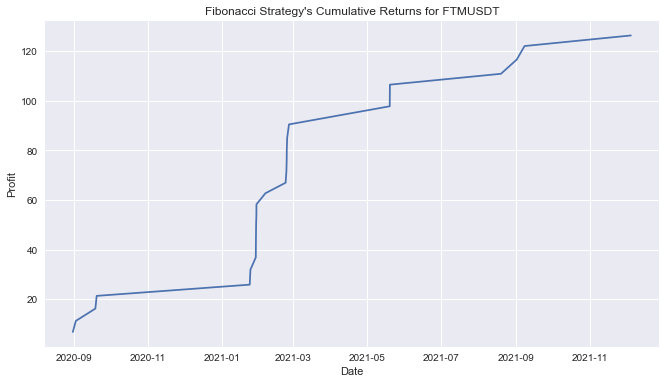

Total Profit: 126.3%
Winners: 24
Losers:0
Win Rate: 100.0%


In [100]:
# Calculate
profits = np.array(profits)
winners = len(profits[profits > 0])
losers = len(profits[profits < 0])
cumulative_returns = np.add.accumulate(profits)
total_profit = sum(profits)
# Plot
plt.title(f"Fibonacci Strategy's Cumulative Returns for {pair}") 
plt.xlabel("Date")
plt.ylabel("Profit") 
plt.rcParams["figure.figsize"] = [11,6]
plt.plot(exit_dates,cumulative_returns)
plt.show()

total = f'Total Profit: {round(total_profit,2)}%\nWinners: {winners}\nLosers:{losers}\nWin Rate: {round(winners*100/(winners+losers),2)}%'
print(total)
